<h1 style='color: #6a5acd; font-size: 34px; font-weight: bold;'>Exploração Biblioteca UFRN

</h1>


# <font color="#cda35a" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #cda35a;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b> Explorar dos dados da biblioteca da UFRN, e responder algumas preguntas, como: A quantidade de empréstimos está aumentando ou diminuindo ao decorrer dos últimos anos? Em quais bibliotecas do sistema estão a maior quantidade de empréstimos?
Quais são os temas mais emprestados? E os menos? _______ e indentificar possíveis problemas e soluções </b></i>     
</p>

---

# <font color="#cda35a" style="font-size: 30px;">Roteiro</font>
<hr style="border: 2px solid #cda35a;">

<h1 style='color: black; font-size:22px; font-weight: bold;'> 1. Importação de dados
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'>2. Limpeza de dados

</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
3. Análise exploratória de dados e DateTime
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
4. Análise exploratória de dados e Variáveis categóricas
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
5. Análise exploratória de dados e Boxplot
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
6. JSON, Excel e Pivot_table
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
7. Customização de tabelas
</h1>

---

# <font color="#cda35a" style="font-size: 30px;">1. Importação de dados</font>
<hr style="border: 2px solid #cda35a;">

---
## <font color=#5abdcd style="font-size: 30px;">Unificar todos os arquivos em um único Dataframe</font>

---

In [287]:
#importando bibliotecas

import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [288]:
# Lista para armazenar os caminhos dos arquivos CSV
file_paths = [
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20101.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20102.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20111.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20112.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20121.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20122.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20131.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20132.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20141.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20142.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20151.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20152.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20161.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20162.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20171.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20172.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20181.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20182.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20191.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20192.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20201.csv")
]


# Lista para armazenar os DataFrames de cada arquivo
data_frames = []

# Iterar sobre os caminhos dos arquivos CSV
for file_path in file_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenar os DataFrames em um único DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

In [289]:
df_parquet = pd.read_parquet(os.path.join("Datasets", "dados_exemplares.parquet"))
df = combined_df.merge(df_parquet, on="codigo_barras", how="left")
df.head(3)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,75019.0


---
## <font color=#5abdcd style="font-size: 30px;">Limpando dados Nulos e Duplicatas</font>

---

In [290]:
# Remover linhas com valores ausentes
df.dropna(inplace=True)

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)

# <font color="#cda35a" style="font-size: 30px;">2. Limpeza de dados</font>
<hr style="border: 2px solid #cda35a;">

In [291]:
intervalos = {
    (0, 100): 'Generalidades',
    (100, 200): 'Filosofia e psicologia',
    (200, 300): 'Religião',
    (300, 400): 'Ciências sociais',
    (400, 500): 'Classe vaga',
    (500, 600): 'Matemática e ciências naturais',
    (600, 700): 'Ciências aplicadas',
    (700, 800): 'Belas artes',
    (800, 900): 'Linguagem',
    (900, float('inf')): 'Geografia. Biografia. História.'
}

CDU_lista = []
for CDU in df['localizacao']:
    categoria = next(value for (key_start, key_end), value in intervalos.items() if CDU >= key_start and CDU < key_end)
    CDU_lista.append(categoria)

df['CDU_geral'] = CDU_lista

In [292]:
df.drop(columns=['registro_sistema'],inplace=True)
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype('string')

# <font color="#cda35a" style="font-size: 30px;">3. Análise exploratória de dados e DateTime </font>
<hr style="border: 2px solid #cda35a;">

In [293]:
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

In [294]:
df['Ano_Emprestimo'] = df['data_emprestimo'].dt.year.astype(int)

total_por_ano = []
for ano in list(df['Ano_Emprestimo'].unique()):
    total = df.query("Ano_Emprestimo == @ano")['id_exemplar'].count()
    total_por_ano.append(total)
total_por_ano

[71336, 93768, 103915, 105416, 94177, 85409, 94921, 94080, 81853, 74149, 7388]

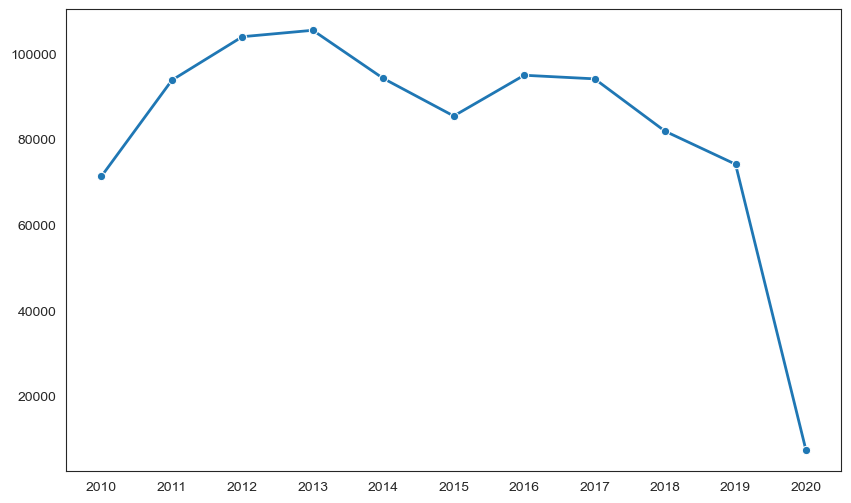

In [295]:
#Plotando o Gráfico

anos = list(df['Ano_Emprestimo'].unique())

# Remover Bordas 
sns.set_style("white")


plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=anos, y=total_por_ano, lw=2, marker='o')

# Label x
plt.xticks(anos)



plt.show()

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


### <font color=#5abdcd style="font-size: 30px;">Houve uma grande queda no ano da pandemia</font>
### <font color=#5abdcd style="font-size: 30px;">declínio de 2013 a 2015</font>
### <font color=#5abdcd style="font-size: 30px;">depois de um avanço em 2015 voltou a cair</font>

---

In [296]:
#separando os meses
df['mes_emprestimo'] = df['data_emprestimo'].dt.month.astype(int)

#contando quantos empréstimos por mês
filmes_por_mes = df.groupby('mes_emprestimo')['id_exemplar'].count()


# Renomeando os meses
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}
filmes_por_mes.index = filmes_por_mes.index.map(dicionario_meses)

filmes_por_mes = filmes_por_mes.to_frame()
filmes_por_mes.index.name = 'mes'
filmes_por_mes.columns = ['quantidade']
filmes_por_mes

,quantidade
mes,
Jan,36231
Fev,109353
Mar,108625
Abr,91686
Mai,81520
Jun,44944
Jul,64493
Ago,111095
Set,93015


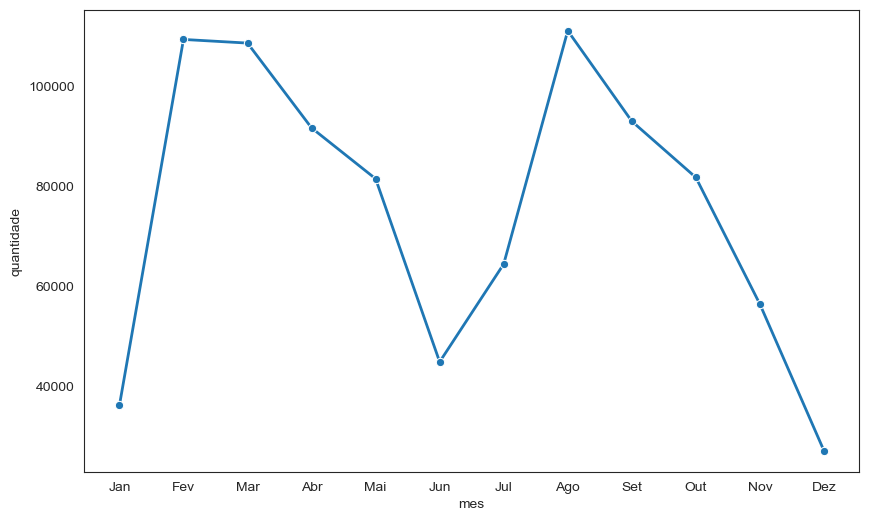

In [297]:
#Plotando o Gráfico

#anos = list(df['Ano_Emprestimo'].unique())

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=filmes_por_mes.index, y=filmes_por_mes['quantidade'], lw=2, marker='o')

plt.show()

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


### <font color=#5abdcd style="font-size: 30px;">os meses de Janeiro, Junho e Dezembro são os menos movimentados, normalmente meses de férias</font>
### <font color=#5abdcd style="font-size: 30px;">meses mais ativos (fevereiro e agosto)</font>
### <font color=#5abdcd style="font-size: 30px;">no meses de pouco movimento pode-ser incluir férias para a maioria dos colaboradores.</font>

---

In [298]:
#separando os horários
df['hora_emprestimo'] = df['data_emprestimo'].dt.hour.astype(int)

#contando quantos empréstimos por hora
filmes_por_hora = df.groupby('hora_emprestimo')['id_exemplar'].count()

# Tabela com o movimento em cada horário 
filmes_por_hora = filmes_por_hora.to_frame()
filmes_por_hora.index.name = 'Hora'
filmes_por_hora.columns = ['quantidade']
filmes_por_hora.sort_values(by='quantidade', ascending=False)

,quantidade
Hora,
16,92822
17,82122
18,81939
10,81028
11,77772
15,72048
12,66460
14,66175
20,57247


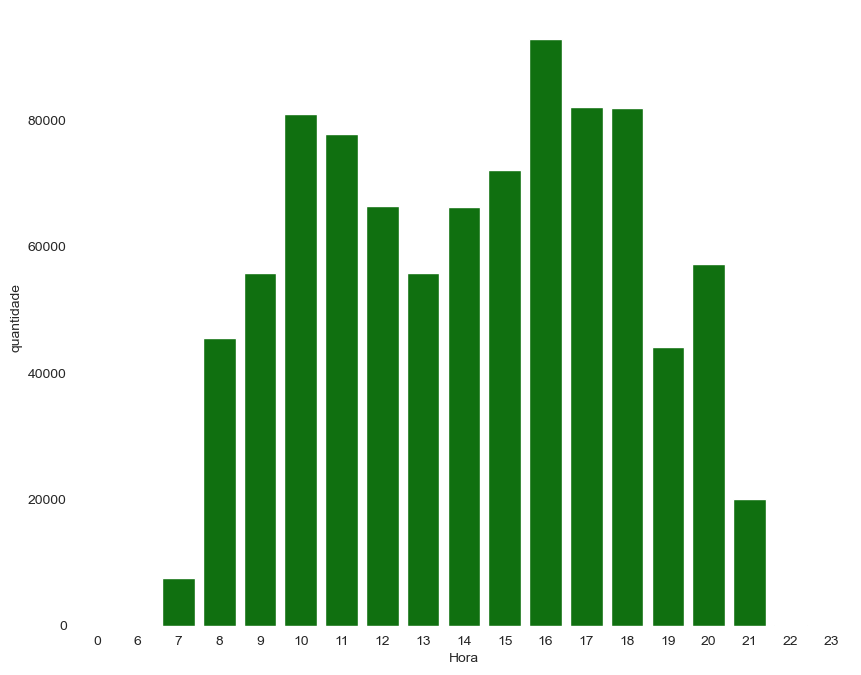

In [299]:
#plotando gráfico de barras

plt.figure(figsize=(10,8))

ax = sns.barplot(x= filmes_por_hora.index, y =filmes_por_hora['quantidade'], color = 'Green')

# Remover borda externa
sns.despine(left=True, right=True, top=True, bottom=True)

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


## <font color=#5abdcd style="font-size: 30px;">quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário:</font>
# > <font color=#5abdcd style="font-size: 30px;">Até as 7 horas da manhã o movimento é baixo.</font>
# > <font color=#5abdcd style="font-size: 30px;">Das 21 horas em diante.</font>

---

# <font color="#cda35a" style="font-size: 30px;">4. Análise exploratória de dados e Variáveis categóricas</font>
<hr style="border: 2px solid #cda35a;">

---
## <font color=#5abdcd style="font-size: 30px;">O objetivo será entender a quantidade de empréstimos a partir das variáveis categóricas do conjunto de dados.</font>

---

Tipo de vínculo
Coleção
Biblioteca
Classificação geral da CDU

---

De quais temas da CDU são os exemplares emprestados?


---


Gere uma tabela de frequência e com o percentual para cada variável.

In [300]:
#Qual são os valores únicos de nossas variáveis categóricas

for i in ['tipo_vinculo_usuario', 'colecao', 'biblioteca', 'CDU_geral']:
    print(df[i].unique(),'\n')   

['ALUNO DE PÓS-GRADUAÇÃO' 'ALUNO DE GRADUAÇÃO'
 'SERVIDOR TÉCNICO-ADMINISTRATIVO' 'DOCENTE' 'DOCENTE EXTERNO'
 'ALUNO MÉDIO/TÉCNICO' 'USUÁRIO EXTERNO'] 

['Acervo Circulante' 'Monografias' 'Publicações de Autores do RN'
 'Multimeios' 'Eventos' 'Publicações da UFRN' 'Folhetos'
 'Obras de Referência' 'Dissertações' 'Coleção Zila Mamede'
 'Coleção Mossoroense' 'Trabalho Acadêmico'
 'Necessidades Educacionais Específicas' 'Obras Raras'
 'Literatura de Cordel' 'Teses'] 

['Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba'
 'Biblioteca Central Zila Mamede'
 'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN'
 'Biblioteca Setorial do Centro Ciências da Saúde - CCS'
 'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia'
 'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA'
 'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT'
 'Biblioteca S

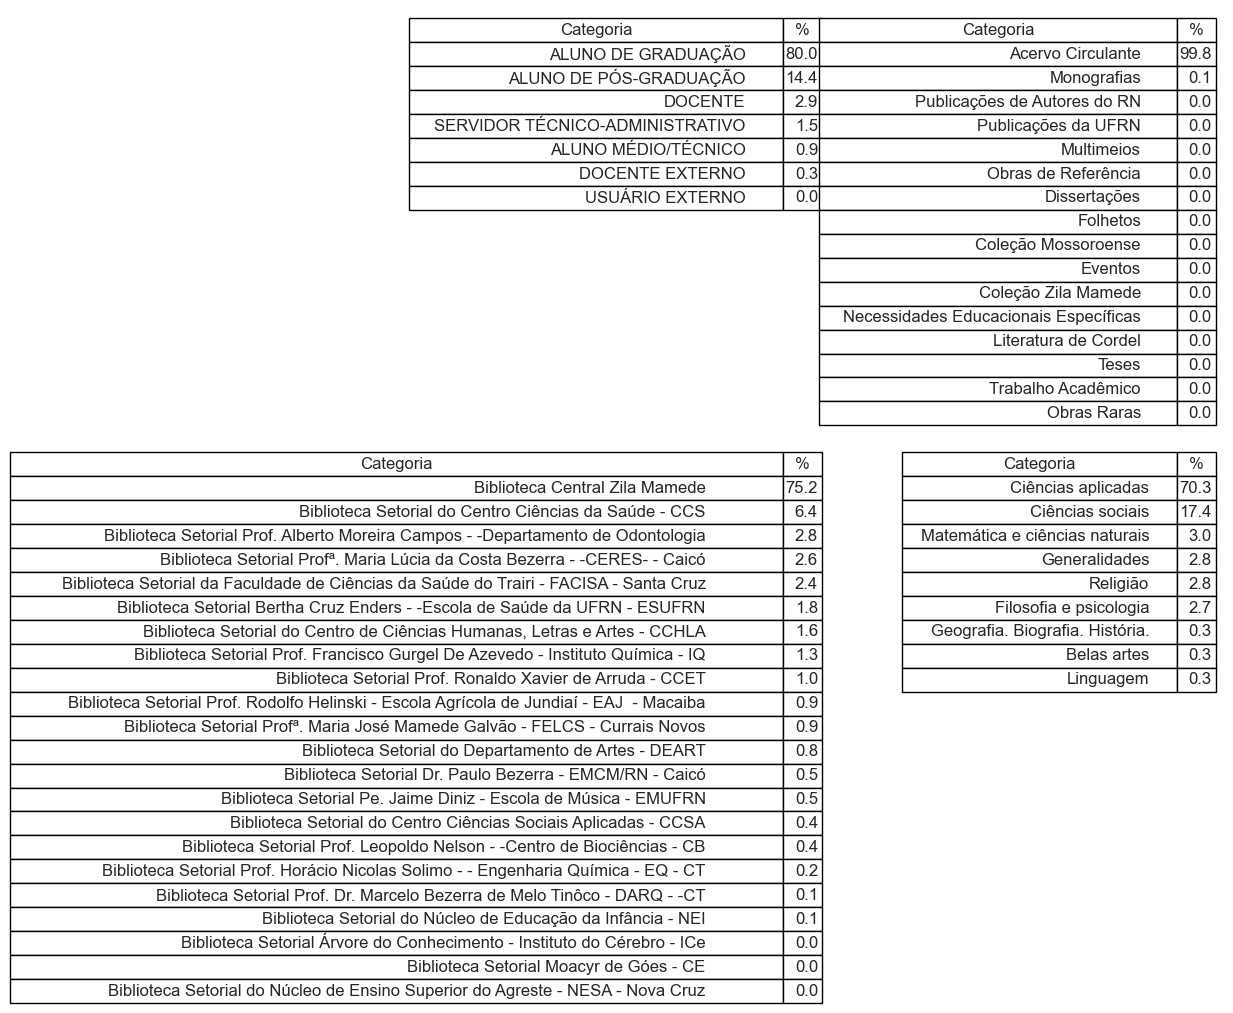

In [301]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 10))

lista = ['tipo_vinculo_usuario', 'colecao', 'biblioteca', 'CDU_geral']

num_rows = 2  # Número de linhas de subplots
num_cols = 2  # Número de colunas de subplots

for idx, col in enumerate(lista):
    total = df[col].value_counts().sum()
    percentage = ((df[col].value_counts() * 100) / total).round(1)
    
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    ax.axis('off')  # Remover eixo para mostrar apenas a tabela
    
    # Criar a tabela de frequência
    tab_data = []
    for index, value in percentage.items():
        tab_data.append([index, value])
    tab = ax.table(cellText=tab_data, colLabels=['Categoria', '%'], loc='upper right')
    tab.auto_set_font_size(False)
    tab.set_fontsize(12)
    tab.scale(1.2, 1.2)
    tab.auto_set_column_width([0, 1])  # Ajustar largura das colunas
    
plt.tight_layout()
plt.show()


---

## <font color=#5abdcd style="font-size: 25px;">Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?.</font>

---

> <font color='black' style="font-size: 15px;">Em torno de 80% dos alunos que fazem empréstimos são da graduação, seguidos dos de pós graduação. Indicando que muito provavelmente livros da ementas dos cursos de graduação são os mais requisitados.</font>

> <font color='black' style="font-size: 15px;">Possíveis causas: Maior número de alunos de graduação em relação a outros, Uma maior dependência dos alunos de Graduação a biblioteca para possuir os livros necessários para o estudo</font>
---
## <font color=#5abdcd style="font-size: 30px;">Quais coleções são mais emprestadas?</font>

---

> <font color='black' style="font-size: 15px;">Em torno de 99% das coleções Acervo Circulante, seguidos de Multimeios e Monografias.</font>

> <font color='black' style="font-size: 15px;">Possíveis causas: Pouca categorização dos exemplares, sendo acervo circulante um termo genérico, mas também buscar entender essa diferença tão grande para outras coleções muito importantes (monografias, dissertações e teses)</font>

---
## <font color=#5abdcd style="font-size: 30px;">Quais são as bibliotecas com mais ou menos quantidade de empréstimos?</font>

---

> <font color='black' style="font-size: 15px;">Em torno de 68% dos empréstimos ocorrem Biblioteca Central Zila Mamede, que fica na Universidade pública em Natal, Rio Grande do Norte. Em seguida a Biblioteca Setorial do Centro Ciências da Saúde - CCS com 6%.</font>

> <font color='black' style="font-size: 15px;">Possíveis causas: Como e onde foi feita a amostragem do dataframe, localização das bibliotecas (se estão em grandes centros ou não) ou até mesmo alguma questão de desempenho interno dessas bibliotecas, se elas possum um bom acervo, um bom atendimento.</font>

---
## <font color=#5abdcd style="font-size: 30px;">De quais temas da CDU são os exemplares emprestados?</font>

---

> <font color='black' style="font-size: 15px;">De forma ampla, é evidente que existe uma notável disparidade entre os assuntos em análise. Será de relevância compreender o motivo pelo qual os conteúdos abordando Geografia/Biografia/História, Belas Artes e Linguagem apresentam números tão diminutos.)</font>

# <font color="#cda35a" style="font-size: 30px;">5. Análise exploratória de dados e Boxplot</font>
<hr style="border: 2px solid #cda35a;">

---
## <font color=#5abdcd style="font-size: 30px;">avaliar dentre os alunos de graduação e pós graduação a distribuição de empréstimos mensais por ano realizados entre 2010 e 2020 da coleção que tiver a maior frequência de empréstimos.</font>

---

In [302]:
alunos_graduacao = df.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
alunos_graduacao_acervo_circulante = alunos_graduacao.query('colecao == "Acervo Circulante"')
alunos_graduação_num_emprestimos = alunos_graduacao_acervo_circulante[['Ano_Emprestimo', 'mes_emprestimo']].value_counts().to_frame().reset_index()

In [303]:
alunos_graduação_num_emprestimos.rename(columns={0: 'quantidade'}, inplace=True)
alunos_graduação_num_emprestimos

,Ano_Emprestimo,mes_emprestimo,quantidade
0,2013,2,11739
1,2011,8,11696
2,2012,8,11641
3,2015,2,11374
4,2012,3,10814
...,...,...,...
118,2020,3,1292
119,2010,12,1073
120,2020,1,1024
121,2019,12,982


Text(0, 0.5, 'Quantidade')

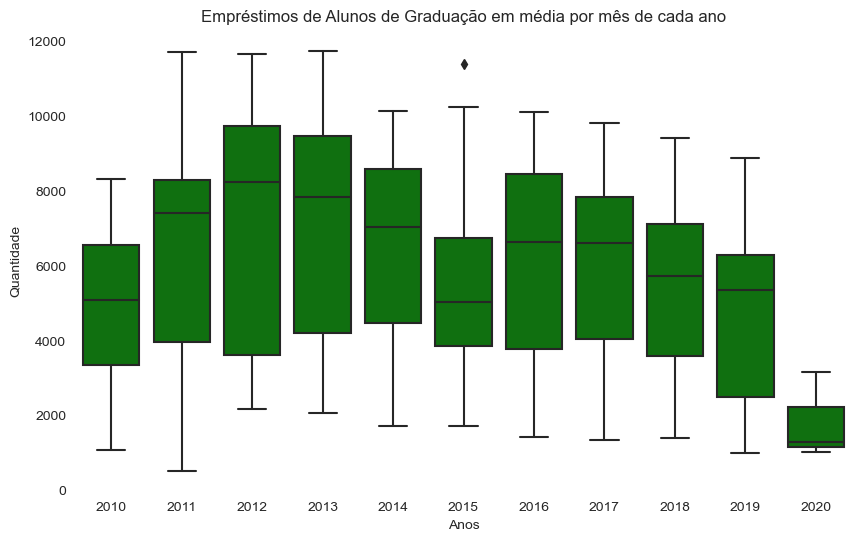

In [304]:
# gerando gráfico boxplot


plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Ano_Emprestimo', y='quantidade', data=alunos_graduação_num_emprestimos, color='green')
sns.despine(left=True, right=True, top=True, bottom=True)

plt.title("Empréstimos de Alunos de Graduação em média por mês de cada ano")
plt.xlabel("Anos")
plt.ylabel("Quantidade")

In [305]:
alunos_pos_graduacao = df.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao.query('colecao == "Acervo Circulante"')
alunos_pos_graduação_num_emprestimos = alunos_pos_graduacao_acervo_circulante[['Ano_Emprestimo', 'mes_emprestimo']].value_counts().to_frame().reset_index()

In [306]:
alunos_pos_graduação_num_emprestimos.rename(columns={0: 'quantidade'}, inplace=True)
alunos_pos_graduação_num_emprestimos

,Ano_Emprestimo,mes_emprestimo,quantidade
0,2017,8,1833
1,2016,8,1794
2,2015,3,1724
3,2018,3,1687
4,2014,2,1676
...,...,...,...
118,2020,1,486
119,2020,2,390
120,2020,3,336
121,2011,1,227


Text(0, 0.5, 'Quantidade')

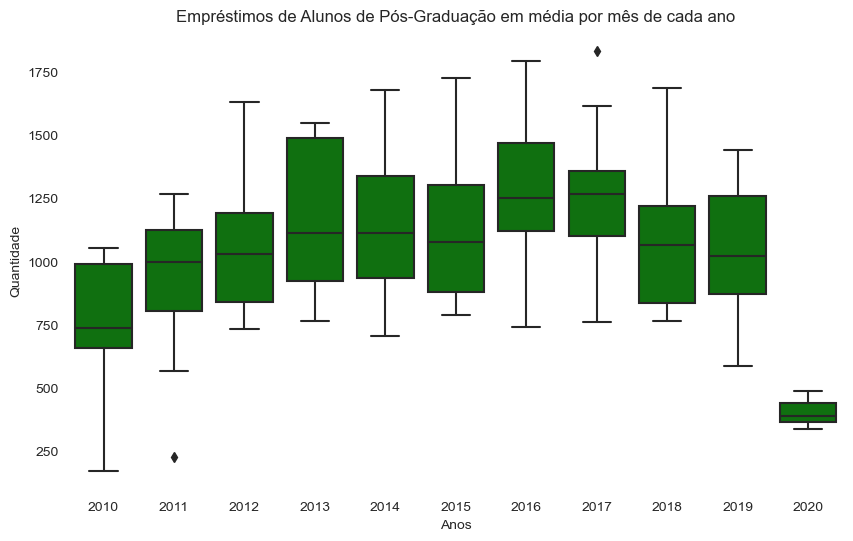

In [307]:
# gerando gráfico boxplot


plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Ano_Emprestimo', y='quantidade', data=alunos_pos_graduação_num_emprestimos, color='green')
sns.despine(left=True, right=True, top=True, bottom=True)

plt.title("Empréstimos de Alunos de Pós-Graduação em média por mês de cada ano")
plt.xlabel("Anos")
plt.ylabel("Quantidade")

## <font color=#5abdcd style="font-size: 25px;">Comentários: Alunos de Graduação</font>

---

> <font color='black' style="font-size: 15px;">Assim como foi possível notar no gráfico de linhas, que englobava todos os dados, notamos um crescimento dos empréstimos de 2010 a 2013. Os anos de 2014 e 2017 são parecidos em aspectos representativos, e também simbolizam anos de queda após um período de elevação. Em 2020 podemos notar os efeitos da pandemia nos empréstimos</font>


---
## <font color=#5abdcd style="font-size: 25px;">Comentários: Alunos de Pós-Graduação</font>

---

> <font color='black' style="font-size: 15px;">Interessante notar que algumas tendências de repetem (como a elevação em até 2013 e queda em 2014). O que pode sinalizar que o motivo da queda não está relacionado ao tipo de vínculo. É possível verificar também uma variação cada vez menor entre os valores dos quartis, significando um padrão mais estável de empréstimos ao longo do ano </font>



---

# <font color="#cda35a" style="font-size: 30px;">6. JSON, Excel e Pivot_table</font>
<hr style="border: 2px solid #cda35a;">

Olá, Miguel Freire. Tudo bem?

Você já está chegando na reta final do #7DaysOfCode!

Hoje, você terá mais dados para enriquecer as suas análises.

As instituições de ensino superior (IES) têm a necessidade de passar por avaliações do Ministério da Educação (MEC) para que possam ofertar e continuar ofertando cursos de graduação e pós-graduação.

A biblioteca universitária faz parte de um dos indicadores da avaliação dos cursos, em principalmente três aspectos: acervo, infraestrutura e serviços.

Dentre os serviços, são avaliados se existem recursos de bases referenciais para pesquisa, se há treinamentos para os usuários utilizarem os materiais, e a presença de indicadores sobre o uso dos materiais do acervo (empréstimos, consultas) dentre outros tópicos.

Durante meu trabalho como bibliotecário universitário, eu já passei por esta experiência, e um dos indicadores enviados foi a quantidade de empréstimos realizados nos últimos anos pelos cursos que seriam avaliados.

Por este motivo, no desafio de hoje, você precisará de novas métricas em relação aos empréstimos, de acordo com os cursos.

Você precisará calcular a quantidade de empréstimos realizados entre 2015 e 2020 por cada curso de graduação que passará pela avaliação.

Os cursos serão:

Biblioteconomia
Ciências sociais
Comunicação social
Direito
Filosofia
Pedagogia

A universidade forneceu os dados dos usuários, mas uma parte deles está em planilhas de Excel, a outra parte veio através de uma API do sistema em formato JSON.

Extraia os dados destes arquivos, agrupe-os em apenas um só, e verifique depois a quantidade de empréstimos.

Gere uma tabela com as seguintes características:

Índice: Cursos
Colunas: Ano
Valores: Quantidade de empréstimos
Total: Acrescente uma linha e uma coluna de total a tabela


In [308]:
#Importando os dados do excel

path = os.path.join("Datasets", "matricula_alunos.xlsx")
df_excel = pd.read_excel(path)

# Definir a primeira linha como rótulos de coluna
df_excel.columns = df_excel.iloc[0]

# Remover a primeira linha (que agora é a linha de rótulos)
df_excel = df_excel[1:]

df_excel.columns =  ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
df_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
5,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7722,2009075211.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7723,2009075249.0,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7724,2009075294.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7725,2009075300.0,ALUNO DE GRADUAÇÃO,MÚSICA


---
# O código da próxima célula é uma melhoria do código bruto que vou por abaixo, fazendo esse registro para sempre que abrir o código ter a oportunidade de comparar as mudanças:

---


``` pyhton

    # Carregar os dados JSON
    df_json = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Python+Pandas+6%2F7%3A+%F0%9F%91%A9%F0%9F%8F%BD%E2%80%8D%F0%9F%92%BB+JSON%2C+Excel+e+Pivot_table&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Python+Pandas+-+1%C2%AA+Ed+%29+6%2F7')
    df_json_real = df_json.registros

    # Dividindo graduação de pós
    dados_json_graduação = json.loads(df_json_real[0])
    dados_json_pos_graduação = json.loads(df_json_real[1])

    # lista das colunas que serão geradas e uma lista e dataframe vazios
    lista =  ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
    lista_colunas_adicionar = []
    df_json = pd.DataFrame()
    df_json_1 = pd.DataFrame()

    for z in lista:
        for i in dados_json_graduação:
            dados_json = i[z]
            lista_colunas_adicionar.append(dados_json)

        lista_colunas_adicionar = pd.Series(lista_colunas_adicionar)  
        df_json = pd.concat([df_json, lista_colunas_adicionar], axis=1)
        lista_colunas_adicionar = []

    for z in lista:
        for i in dados_json_pos_graduação:
            dados_json = i[z]
            lista_colunas_adicionar.append(dados_json)

        lista_colunas_adicionar = pd.Series(lista_colunas_adicionar)  
        df_json_1 = pd.concat([df_json_1, lista_colunas_adicionar], axis=1,)
        lista_colunas_adicionar = []


    df_json_final = pd.concat([df_json, df_json_1], ignore_index=True)
    df_json_final.columns = lista
    df_json_final
```

In [309]:

# Carregar os dados JSON
df_json = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Python+Pandas+6%2F7%3A+%F0%9F%91%A9%F0%9F%8F%BD%E2%80%8D%F0%9F%92%BB+JSON%2C+Excel+e+Pivot_table&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Python+Pandas+-+1%C2%AA+Ed+%29+6%2F7')
df_json_real = df_json.registros

# Função para processar os registros JSON
def processar_registros(registros):
    lista =  ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
    df = pd.DataFrame()

    for z in lista:
        coluna = [i[z] for i in registros]
        df[z] = coluna

    return df

# Dividindo graduação de pós
dados_json_graduação = json.loads(df_json_real[0])
dados_json_pos_graduação = json.loads(df_json_real[1])

# Processar os registros e concatenar
df_graduação = processar_registros(dados_json_graduação)
df_pos_graduação = processar_registros(dados_json_pos_graduação)

# Concatenar os dataframes
df_json_final = pd.concat([df_graduação, df_pos_graduação], ignore_index=True)
df_json_final


,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346.0,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572.0,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
82237,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
82238,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
82239,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
82240,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


---
## <font color=#5abdcd style="font-size: 30px;">Unindo dataframes excel e json</font>

---

In [323]:
df_concat_json_excel = pd.concat([df_json_final, df_excel], ignore_index=True)
df_concat_json_excel = df_concat_json_excel.drop_duplicates(subset='matricula_ou_siape', inplace=False)
df_concat_json_excel[df_concat_json_excel['matricula_ou_siape'] == '2009029003.0']

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA


---
## <font color=#5abdcd style="font-size: 30px;">Unindo dataset principal com o concat de excel e json</font>

---

In [325]:
df_final = df.merge(df_concat_json_excel, on="matricula_ou_siape", how="left")
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906412 entries, 0 to 906411
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id_emprestimo           906412 non-null  int64         
 1   codigo_barras           906412 non-null  object        
 2   data_renovacao          906412 non-null  object        
 3   data_emprestimo         906412 non-null  datetime64[ns]
 4   data_devolucao          906412 non-null  object        
 5   matricula_ou_siape      906412 non-null  object        
 6   tipo_vinculo_usuario_x  906412 non-null  object        
 7   id_exemplar             906412 non-null  float64       
 8   colecao                 906412 non-null  object        
 9   biblioteca              906412 non-null  object        
 10  status_material         906412 non-null  object        
 11  localizacao             906412 non-null  float64       
 12  CDU_geral               906412

In [326]:
df_final

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario_x,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral,Ano_Emprestimo,mes_emprestimo,hora_emprestimo,tipo_vinculo_usuario_y,curso
0,709686,2006017618,2010/01/26 08:07:01.738000000,2010-01-04 08:08:44.081,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas,2010,1,8,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,709687,L184117,2010/01/18 11:07:46.470000000,2010-01-04 08:24:21.284,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas,2010,1,8,ALUNO DE GRADUAÇÃO,GEOGRAFIA
2,709688,2007027500,2010/01/19 15:59:26.464000000,2010-01-04 08:27:33.569,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas,2010,1,8,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
3,709689,L157395,2010/01/19 15:59:26.447000000,2010-01-04 08:27:33.596,2010/02/03 13:06:43.125000000,2009045971.0,ALUNO DE GRADUAÇÃO,57040.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,698.0,Ciências aplicadas,2010,1,8,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
4,709691,2008046357,2010/01/19 11:50:13.404000000,2010-01-04 09:02:30.576,2010/02/02 12:13:36.132000000,200507453.0,ALUNO DE GRADUAÇÃO,256537.0,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,645.0,Ciências aplicadas,2010,1,9,ALUNO DE GRADUAÇÃO,LETRAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906407,2988998,2010084076,2020/04/27 23:27:14.132000000,2020-03-17 19:23:11.780,2021/08/25 16:18:43.000000000,20180145398.0,ALUNO DE GRADUAÇÃO,902461.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,631.0,Ciências aplicadas,2020,3,19,ALUNO DE GRADUAÇÃO,FILOSOFIA
906408,2988999,2011024982,2020/04/27 23:27:14.108000000,2020-03-17 19:23:11.829,2021/11/22 14:50:13.000000000,20180145398.0,ALUNO DE GRADUAÇÃO,932468.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,667.0,Ciências aplicadas,2020,3,19,ALUNO DE GRADUAÇÃO,FILOSOFIA
906409,2989007,2014069838,2020/03/23 10:42:38.432000000,2020-03-17 19:29:17.897,2022/01/20 17:26:19.000000000,20190054410.0,ALUNO DE GRADUAÇÃO,1317032.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,626.0,Ciências aplicadas,2020,3,19,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
906410,2989040,2016025770,2020/04/01 22:25:43.652000000,2020-03-17 20:23:54.966,2021/07/07 15:44:35.000000000,20200090284.0,ALUNO DE GRADUAÇÃO,1245919.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,613.0,Ciências aplicadas,2020,3,20,ALUNO DE GRADUAÇÃO,DIREITO
